In [4]:
!pip install sodapy
!pip install geopandas

In [112]:
# Snippet from: https://dev.socrata.com/foundry/data.cityofchicago.org/d62x-nvdr
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.

from_2020 = "qzdf-xmn8"
from_2019 = "w98m-zvie"
from_2018 = "3i3m-jwuy"
from_2017 = "d62x-nvdr"
crimes = client.get(from_2020, limit=500)

# Convert to pandas DataFrame
crimes_df = pd.DataFrame.from_records(crimes)

# Population of Chicago 2020 = 2694240 

In [1]:
import pandas as pd

In [28]:
data = pd.read_csv("D:\Classes\CSCE320\Project\Crimes_-_2001_to_Present.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [168]:
data2 = pd.read_csv("./below_poverty_level_by_community.csv")

In [169]:
df = df[df['Community Area'].notna()]
df['Month'] = df['Date'].apply(lambda x: int(x.split("/")[0]))
df['Day'] = df ['Date'].apply(lambda x: int(x.split("/")[1]))
print(df)
print(data)

               ID Case Number                    Date  \
63291    11665567    JC234307  04/10/2019 04:37:00 PM   
63376    11667963    JC235212  04/12/2019 04:08:00 PM   
63377    11667968    JC237058  04/19/2019 01:57:00 PM   
63453    11668309    JC238187  04/25/2019 05:20:00 PM   
63857    11692179    JC261724  05/13/2019 05:26:00 PM   
...           ...         ...                     ...   
7221318   9999999    HY189683  03/18/2015 05:08:00 PM   
7221319  11700037    JC278815  05/26/2019 12:10:00 AM   
7221321  11700926    JC279725  05/26/2019 05:13:00 PM   
7221322     24560    JC279072  05/26/2019 06:48:00 AM   
7221325     24559    JC278908  05/26/2019 02:11:00 AM   

                                       Block  IUCR  \
63291                     102XX S VERNON AVE  1562   
63376                     032XX N KEELER AVE  1754   
63377                    002XX N LARAMIE AVE  1752   
63453    108XX S DR MARTIN LUTHER KING JR DR  0486   
63857                     090XX S RACINE AVE 

In [176]:
# 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT','BATTERY', 'ASSAULT', 'ROBBERY', 'ARSON', 
violent_crime = ['HOMICIDE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT','BATTERY', 'ASSAULT']
df['Violent'] = df['Primary Type'].apply(lambda x: x in violent_crime)


In [226]:
data['Month'] = data['Date'].apply(lambda x: int(x.split("/")[0]))
data['Day'] = data ['Date'].apply(lambda x: int(x.split("/")[1]))
violent_crime = ['HOMICIDE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT','BATTERY', 'ASSAULT']
data['Violent'] = data['Primary Type'].apply(lambda x: x in violent_crime)


for i in range(1, 77):
    total_in_area = data2[data2['Community Area Number'] == i]
    print(total_in_area['Community Area Number'].value_counts().tolist())


In [178]:
import pandas as pd
import osgeo
import geopandas as gpd
import numpy as np



chicago_areas = gpd.read_file("./Boundaries - Community Areas (current)/geo_export_9cce659e-5ccf-4293-b615-10de388a3d8a.shp")
chicago_areas = chicago_areas[['area_numbe', 'geometry']]
chicago_areas.rename(columns = {"area_numbe": "Community Area Number"}, inplace = True)




In [187]:
chicago_areas['Hardship'] = data2['HARDSHIP INDEX']
print(chicago_areas['Hardship'])

0     39.0
1     46.0
2     20.0
3     17.0
4      6.0
      ... 
72    48.0
73    16.0
74    30.0
75    24.0
76    19.0
Name: Hardship, Length: 77, dtype: float64


In [180]:
max(area_total)

120688

Text(0.5, 1.0, 'Chicago Community Areas Hardship Index 2008-2012')

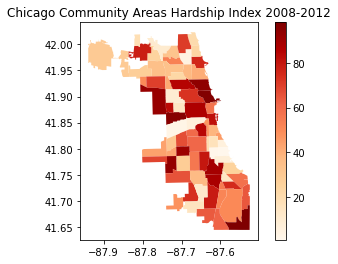

In [181]:
chicago_areas.plot(column = "Hardship", cmap = "OrRd", legend = True)
plt.title('Chicago Community Areas Hardship Index 2008-2012')

Text(0.5, 1.0, 'Total Non-Violent Crimes 2008-2012')

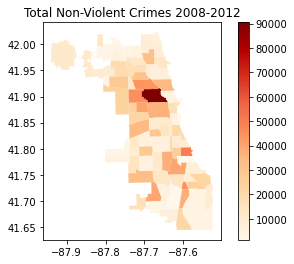

In [204]:
area_total = []

Yeardf = df.loc[(df['Year'] >= 2008) & (df['Year'] <= 2012)]
Yeardf = Yeardf[Yeardf['Violent'] == False]
area = Yeardf['Community Area'].unique()
for i in range(1, 78):
    if (i in area):
        total_in_area = Yeardf[Yeardf['Community Area'] == i] 
        area_total.append(int(total_in_area['Community Area'].value_counts()))
    else:
        area_total.append(0)
chicago_areas['Total Crimes'] = pd.DataFrame(np.array(area_total))

chicago_areas.plot(column = "Total Crimes", cmap = "OrRd", legend = True)
plt.title('Total Non-Violent Crimes 2008-2012')



In [19]:
print(df['Longitude'].min())

BBox = ((-87.7738,   -87.5658, 41.8096, 41.9653))

print(BBox)

-91.686565684
(-87.7738, -87.5658, 41.8096, 41.9653)


In [20]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [21]:
chicagoMap = plt.imread('D:\Classes\CSCE320\Project\ChicagoCrimeAnalysis\Location_map_Chicago.png')

fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(df['Longitude'],df['Latitude'], zorder=1, alpha=0.2,c='b',s=10)


ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])



ax.imshow(chicagoMap, zorder=0, extent = BBox, aspect= 'equal')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Classes\\CSCE320\\Project\\ChicagoCrimeAnalysis\\Location_map_Chicago.png'

[[ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... 39.  0.  0.]
 [ 0.  0.  0. ... 35.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 [33.  0.  0. ...  0.  0.  0.]]


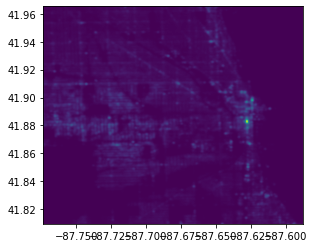

In [22]:

import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline

df = df[df['Latitude']>41.8096]
df = df[df['Latitude']<41.9653]
df = df[df['Longitude']>-87.7738]
df = df[df['Longitude']<-87.5658]

y = df.loc[:, 'Latitude'].tolist()
x = df.loc[:, 'Longitude'].tolist()

heatmap, xedges, yedges = np.histogram2d(x,y,bins=1000)
print(heatmap)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=4)

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

               ID Case Number                    Date  \
63291    11665567    JC234307  04/10/2019 04:37:00 PM   
63376    11667963    JC235212  04/12/2019 04:08:00 PM   
63377    11667968    JC237058  04/19/2019 01:57:00 PM   
63453    11668309    JC238187  04/25/2019 05:20:00 PM   
63857    11692179    JC261724  05/13/2019 05:26:00 PM   
...           ...         ...                     ...   
7221318   9999999    HY189683  03/18/2015 05:08:00 PM   
7221319  11700037    JC278815  05/26/2019 12:10:00 AM   
7221321  11700926    JC279725  05/26/2019 05:13:00 PM   
7221322     24560    JC279072  05/26/2019 06:48:00 AM   
7221325     24559    JC278908  05/26/2019 02:11:00 AM   

                                       Block  IUCR  \
63291                     102XX S VERNON AVE  1562   
63376                     032XX N KEELER AVE  1754   
63377                    002XX N LARAMIE AVE  1752   
63453    108XX S DR MARTIN LUTHER KING JR DR  0486   
63857                     090XX S RACINE AVE 

In [95]:
opt =['All']
for i in range(2001,2021):
    opt.append(str(i))
    
types = ['All']
types += data['Primary Type'].value_counts().index.tolist()

optMonth = ['none']
optDay = ['none']
for i in range (1, 31):
    optDay.append(str(i))
    if (i < 13):
        optMonth.append(str(i))
    

In [192]:
typeDrop = widgets.Dropdown(
    options=types,
    value='All',
    description='Type:'
)

monthDrop = widgets.Dropdown (
    options= optMonth,
    value='none',
    description='Month:'
)

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)

drop2 = widgets.Dropdown(
    options=opt,
    value='2020',
    description='Year:'
)


yr1 = drop
month = monthDrop
cmpr = widgets.Checkbox(description='Compare')
yr2 = drop2
ui = widgets.HBox([typeDrop, month, yr1, cmpr,yr2])

def f(typeOf, month, year1, compare, year2):
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    dfYear = df[df['Year'] == int(year1)]
    title = ""
    if typeOf != 'All':
            dfYear = dfYear[dfYear['Primary Type'] == typeOf]
    if month != 'none':
            dfYear = dfYear[dfYear['Month'] == int(month)]
            title = month_names[int(month) - 1] + " "


    crime_types = dfYear['Primary Type'].value_counts().index.tolist()
    crime_types_count = dfYear['Primary Type'].value_counts()
    
    title += year1 + " Type of Crime"
    
    if compare == True:

        title = year1 + " vs. " + year2+" Type of Crime"
        dfYear2 = df[df['Year'] == int(year2)]
        
        if typeOf != 'All':
            dfYear2 = dfYear2[dfYear2['Primary Type'] == typeOf]
            
        crime_types2 = dfYear2['Primary Type'].value_counts().index.tolist()
        crime_types_count2 = dfYear2['Primary Type'].value_counts()
        fig,ax = plt.subplots(figsize=(8,7))
        ax.set_title(title)
        ax.barh(crime_types,crime_types_count,color = 'b',label=year1)
        ax.barh(crime_types2,crime_types_count2,color = 'r',label=year2)
#         ax.set_xticks(rotation=0)
        ax.invert_yaxis()
        ax.legend(loc='lower right')
        plt.show()
    else:

        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(crime_types,crime_types_count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(crime_types_count):
            plt.text(value, index, str(value))
        plt.show()
    
#     if compare == True:
#         interact(f, year1=drop, compare=False,year2)

    
#interact(f, year=drop, compare=False)
out = widgets.interactive_output(f, {'typeOf': typeDrop, 'month': month, 'year1': yr1, 'compare' : cmpr, 'year2':yr2})


display(ui,out)

Output()

In [241]:

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)
drop2 = widgets.Dropdown(
    options=optMonth,
    value='none',
    description='Month:'
)
drop3 = widgets.Dropdown(
    options=['yes', 'no', 'both'],
    value='both',
    description='Violent Crimes:'
)
cmpr = widgets.Checkbox(description='Compare')
year = drop
month = drop2
violent = drop3
ui = widgets.HBox([year, month, violent,cmpr])

def f2(year, month, violent, compare):
    dfYear = data[data['Year'] == int(year)]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_names2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    if (violent == 'yes'):
        dfYear = dfYear[dfYear['Violent']]
    elif (violent == 'no'):
        dfYear = dfYear[dfYear['Violent'] == False]
 
    
    if (compare):     
        title = "comparison of total crime per month in " + year

        count = []
        dfViolent1 = dfYear[dfYear['Violent']]
        for i in range(1,13):
            dfMonth = dfViolent1[dfViolent1['Month'] == i]

    #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
            total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
            count.append(total_count)
        count2 = []
        dfViolent2 = dfYear[dfYear['Violent'] == False]
        for i in range(1,13):
            dfMonth = dfViolent2[dfViolent2['Month'] == i]

    #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
            total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
            count2.append(total_count)
        total = [x + y for x, y in zip(count, count2)]
        fig,ax = plt.subplots(figsize=(8,7))
        ax.set_title(title)
        ax.barh(month_names2,count2,color = 'grey',label="non-violent")
        for index, value in enumerate(count2):
            plt.text(value, index, str(np.round(value/total[index] * 100)))
        ax.barh(month_names,count,color = 'r',label="violent")
        for index, value in enumerate(count):
            plt.text(value, index, str(np.round(value/total[index] * 100)), color='w')
        ax.invert_yaxis()
        ax.legend(loc='lower right')
        plt.show()
    else: 
        if (month == 'none') :
            count = []
            for i in range(1,13):
                dfMonth = dfYear[dfYear['Month'] == i]

        #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
                total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
                count.append(total_count)
            title = "total crime per month in " + year
            plt.figure(figsize=(8,7))
            plt.title(title)
            plt.barh(month_names,count)
            plt.xticks(rotation=0)
            plt.gca().invert_yaxis()
            for index, value in enumerate(count):
                plt.text(value, index, str(value))
            plt.show()
        else :
            dfMonth = dfYear[dfYear['Month'] == int(month)]
            bday = dfMonth['Day'].unique().max()
            count = []
            days = []
            for i in range(1, bday + 1):
                days.append(str(i))
                dfDay = dfMonth[dfMonth['Day'] == i]
                total_count = sum(dfDay['Primary Type'].value_counts().tolist())
                count.append(total_count)
            title = "total crime per day in " + month_names[int(month) - 1] + ", " +  year
            plt.figure(figsize=(10,12))
            plt.title(title)
            plt.barh(days,count)
            plt.xticks(rotation=0)
            plt.gca().invert_yaxis()
            for index, value in enumerate(count):
                plt.text(value, index, str(value))
            plt.show()

out = widgets.interactive_output(f2, {'year': year, 'month': month, 'violent': violent, 'compare': cmpr})
display(ui,out)


Output()

# Question: Can we predict what location most crime will happen in future years?
## Method: Clustering

In order for us to predict where crime will happen we will use a clustering algorithm called K means. 

**We will use data from the years 2014 to 2018 to try and predict where crime** will happen in future years. Then we will use the data from **the year 2019** to see how accurate our model is. 

But first we need to find out what is the ideal number of clusters we should use for our clustering algorithm. For this we opted to use the silhouette method which measures how similar a point is to its own cluster compared to other cluster

# The Silhouette Method
As you can see below, **the silhoutte method tells us that the most optimal number of clusters is 9**. we should note that we used the data from 2018 only and that we only tested cluster sizes from 3 to 15 so there could be a more optimal number of clusters since the graph appears to be increasing towards the end, but due to time constrains and the silhoutte algorithm take a really long time to evaluate each cluster size, we have opted to just go with 9 clusters which is indicated by the "global" maximum.

(Note: we only included a screenshot of the code since we ran it in another notebook and it took 2 hours to run so we didn't want to waste another 2 hours running it in this notebook)

![title](sil.png)

# Clustering

In this section we run the k means clustering algorithm on a data set containing points for the years 2014 to 2018.

In [83]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("D:\Classes\CSCE320\Project\Crimes_-_2001_to_Present.csv")

## Data cleaning

In [13]:

df = data[data['Year'] < 2019]
df = df[df['Year'] > 2013]
df = df[df['Latitude'].notna()]
df = df[df['Longitude'].notna()]

df = df[df['Latitude'] > 40]
df = df[df['Longitude'] > -91]

latlon16To18 = df[['Latitude', 'Longitude']].copy()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Running Kmeans

In [14]:
kmeans = KMeans(n_clusters = 9).fit(latlon16To18)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])

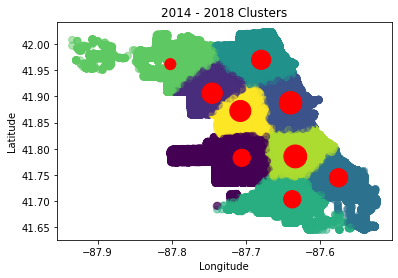

In [27]:
plt.scatter(latlon16To18['Longitude'], latlon16To18['Latitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=counts/400)
plt.title('2014 - 2018 Clusters')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [35]:
print("Counts per centroud: ",counts,"\n centorid coordinates", centroids)

Counts per centroud:  [119575 167088 201853 133504 148094 120786  49165 209249 177900] 
 centorid coordinates [[ 41.7824346  -87.7060526 ]
 [ 41.9060605  -87.74583147]
 [ 41.88770116 -87.6403326 ]
 [ 41.74432662 -87.57567268]
 [ 41.96995457 -87.67979708]
 [ 41.70325497 -87.63794773]
 [ 41.96169334 -87.80215379]
 [ 41.78517085 -87.63388883]
 [ 41.87212362 -87.70793415]]


# Clustering Predictions

As we can see, our **clustering algorithm predicted that most of the crime will happen around longitude and latitude coordinates of (41.78517085, -87.63388883)**,  (41.88770116, -87.6403326), and (41.87212362. -87.70793415) in that order. This is evident by using the cluster centers and the amount of points that each cluster contains

# Evaluating our clusters

To evaluate how good our prediction is we will use the data of 2019 and run the same clustering algorithm and compare out prediction with the actual data of 2019. This should give us an idea of just how close we were to actually predicting future crime using past years.

## More data cleaning

In [17]:
df2 = data[data['Year'] == 2019]
df2 = df[df['Latitude'].notna()]
df2 = df[df['Longitude'].notna()]

df2 = df[df['Latitude'] > 40]
df2 = df[df['Longitude'] > -91]

latlon19 = df2[['Latitude', 'Longitude']].copy()

## Running Kmeans

In [18]:
kmeans2 = KMeans(n_clusters = 9).fit(latlon19)
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_
counts2 = np.bincount(labels2[labels2>=0])

In [34]:
print("Counts per centroud: ",counts2,"\n centorid coordinates", centroids2)

Counts per centroud:  [181682 209265 200952 119977 149577 120540  48521 163270 133430] 
 centorid coordinates [[ 41.8732188  -87.70809948]
 [ 41.78491081 -87.63389946]
 [ 41.88731398 -87.64007232]
 [ 41.78274463 -87.70596916]
 [ 41.96946616 -87.67997031]
 [ 41.70308788 -87.63792428]
 [ 41.96216377 -87.80260369]
 [ 41.90608327 -87.747082  ]
 [ 41.7443002  -87.57563783]]


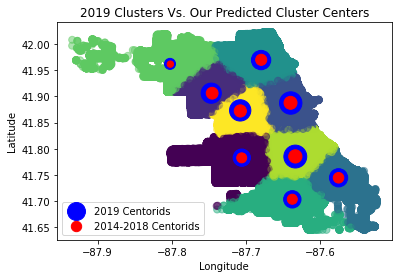

In [32]:
plt.scatter(latlon19['Longitude'], latlon19['Latitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:, 1], centroids2[:, 0], c='blue', s=counts2/400, label='2019 Centorids')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=counts/1200, label='2014-2018 Centorids')

plt.title('2019 Clusters Vs. Our Predicted Cluster Centers')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.legend(loc='best')

plt.show()


# Results

In [67]:
threshold = .025; # approx 2 miles

totalCrimeAt2019 = data[data['Year'] == 2019]

crimeAt2019 = totalCrimeAt2019

crimeAt2019 = crimeAt2019[crimeAt2019['Latitude'] > 41.78517085 - threshold]
crimeAt2019 = crimeAt2019[crimeAt2019['Latitude'] < 41.78517085 + threshold]

crimeAt2019 = crimeAt2019[crimeAt2019['Longitude'] > -87.63388883 - threshold]
crimeAt2019 = crimeAt2019[crimeAt2019['Longitude'] < -87.63388883 + threshold]

In [80]:
threshold = .06; # approx 5 miles

crimeAt5mi = totalCrimeAt2019

crimeAt5mi = crimeAt5mi[crimeAt5mi['Latitude'] > 41.78517085 - threshold]
crimeAt5mi = crimeAt5mi[crimeAt5mi['Latitude'] < 41.78517085 + threshold]

crimeAt5mi = crimeAt5mi[crimeAt5mi['Longitude'] > -87.63388883 - threshold]
crimeAt5mi = crimeAt5mi[crimeAt5mi['Longitude'] < -87.63388883 + threshold]

In [82]:
print("Number of crimes in that are reported within 2 miles for 2019: ",crimeAt2019.shape[0])
print("TOTAL Number of crimes in that are reported for 2019: ",totalCrimeAt2019.shape[0])
print("Percentage of crime that falls within 2 mile radius of prediciton: " , crimeAt2019.shape[0]/totalCrimeAt2019.shape[0] *100, "%" )

print("\nNumber of crimes in that are reported within 5 for 2019: ",crimeAt5mi.shape[0])
print("TOTAL Number of crimes in that are reported for 2019: ",totalCrimeAt2019.shape[0])
print("Percentage of crime that falls within 5 mile radius of prediciton: " , crimeAt5mi.shape[0]/totalCrimeAt2019.shape[0] *100, "%" )




Number of crimes in that are reported within 2 miles for 2019:  16735
TOTAL Number of crimes in that are reported for 2019:  260380
Percentage of crime that falls within 2 mile radius of prediciton:  6.427144942007834 %

Number of crimes in that are reported within 5 for 2019:  71477
TOTAL Number of crimes in that are reported for 2019:  260380
Percentage of crime that falls within 5 mile radius of prediciton:  27.45103310546125 %



Looking at the graph above we can see that our predicted cluster centers are not far off from the actual data from 2019. From the points we got from our first model we predicted that **most crime will happen around the interection of West Jackson Boulevard and South Dearborn Street**, at coordinates (41.78517085, -87.63388883).

If we look at what percentage of crime that falls within a 2 mile radius of that point we see that **6.4% of crime falls within 2 miles of our prediction**. If we increase the range to 5 miles, we see that **27.5% of crime falls within 5 miles of our prediction**. 

To put it into perspective, **Chicago is the size of 234 mi^2**. Our model shows that our prediction contains **6.4% of all crime that happened within an area that is 5.3% of the total size of Chicago, 12.5 mi^2**. It also shows that our prediction contains **27.5% of all crime that happened within an area that is 33.6% of the total size of Chicago, 78.5 mi^2**.

# Conclusion

Our prediction wasn't as accurate as we hoped it would be. We think that it has to do with the fact that crime in Chicago is not distributed along just one certain area, but mostly evenly throughout certain greater parts of the city, which the preliminary analysis proved.

However, we have succeded in providing the top 9 places where crime is most likely to happen.

# Possible Future Data Exploration

In the future we could perhaps instead look at specific crime and see if there is an area where this crime is more promenent. We also could use different size of cluster sizes to make the model more precise.